In [56]:
%matplotlib inline
# packages
import skimage.feature
import skimage.viewer
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import matplotlib.colors as pltcolor
from skimage import color
# modules
import directory as d
import cl_interface as cl
import photometry as ph
import debugtools as db
import filehandling as fh
import rgbapprox as rgba

# set plot size
plt.rcParams["figure.figsize"] = (60, 30)

# loading imported photo as a numpy array
pixels = np.load(d.RAW + 'DSC_1342.npy')

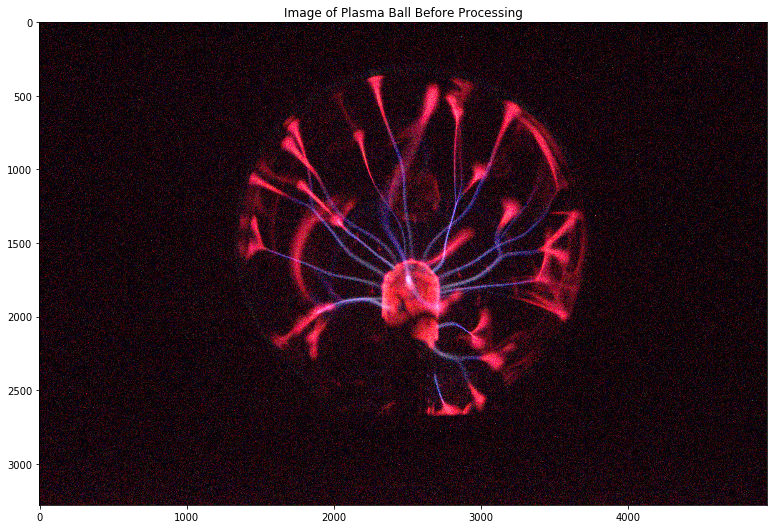

In [57]:
# image before processing
plt.subplot(1,4,1)
plt.title('Image of Plasma Ball Before Processing')
plt.imshow(pixels)

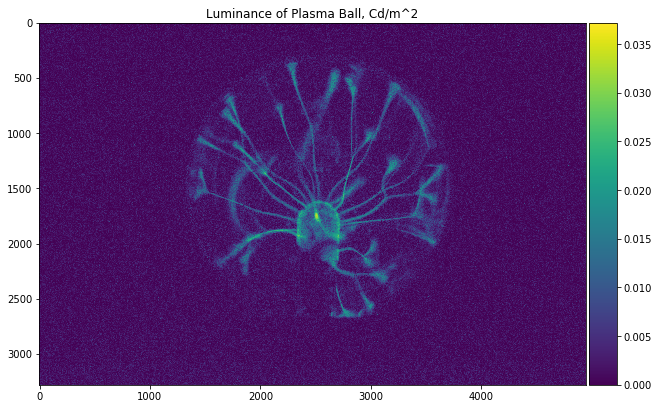

In [58]:
# luminance
plt.subplot(1,5,2)
im = plt.imshow(ph.get_luminance(pixels))

# labelling axes of plot
plt.title('Luminance of Plasma Ball, Cd/m^2')

# adjusting colorbar size
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right',size='5%',pad=0.05)
plt.colorbar(im, cax=cax)



/home/mattketk/git/photometry-of-ordinary-objects/src/rgbapprox.py:63: RuntimeWarning: divide by zero encountered in true_divide
  inverse_hsv = np.divide(1, hsv_values[:,:,0], where=(hsv_values[:,:,2]>value_threshold), out=np.zeros_like(hsv_values[:,:,0]))


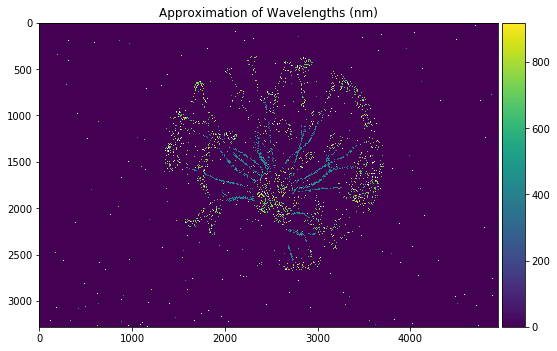

In [45]:
# wavelength approximation????
plt.subplot(1,5,3)
im = plt.imshow(rgba.get_wavelengths(test))

# labelling axes of plot
plt.title('Approximation of Wavelengths (nm)')

# adjusting colorbar size
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right',size='5%',pad=0.05)
plt.colorbar(im, cax=cax)


/home/mattketk/git/photometry-of-ordinary-objects/src/rgbapprox.py:63: RuntimeWarning: divide by zero encountered in true_divide
  inverse_hsv = np.divide(1, hsv_values[:,:,0], where=(hsv_values[:,:,2]>value_threshold), out=np.zeros_like(hsv_values[:,:,0]))


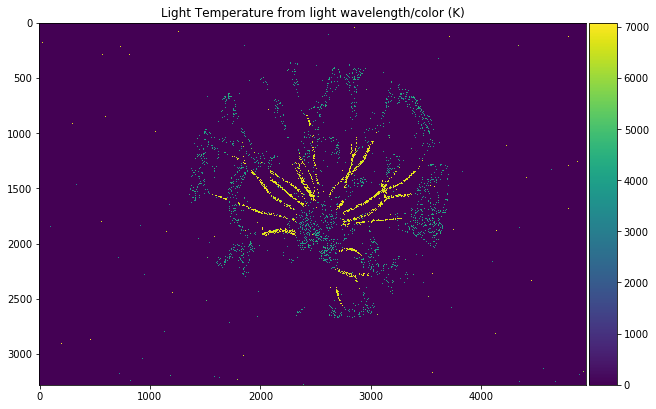

In [59]:
# temperature from light wavelength
plt.subplot(1,5,4)
wavelengths = rgba.get_wavelengths(test)
im = plt.imshow(ph.wavelength_to_temperature(wavelengths))

# labelling axes of plot
plt.title('Light Temperature from light wavelength/color (K)')

# adjusting colorbar size
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right',size='5%',pad=0.05)
plt.colorbar(im, cax=cax)

/home/mattketk/git/photometry-of-ordinary-objects/src/rgbapprox.py:63: RuntimeWarning: divide by zero encountered in true_divide
  inverse_hsv = np.divide(1, hsv_values[:,:,0], where=(hsv_values[:,:,2]>value_threshold), out=np.zeros_like(hsv_values[:,:,0]))


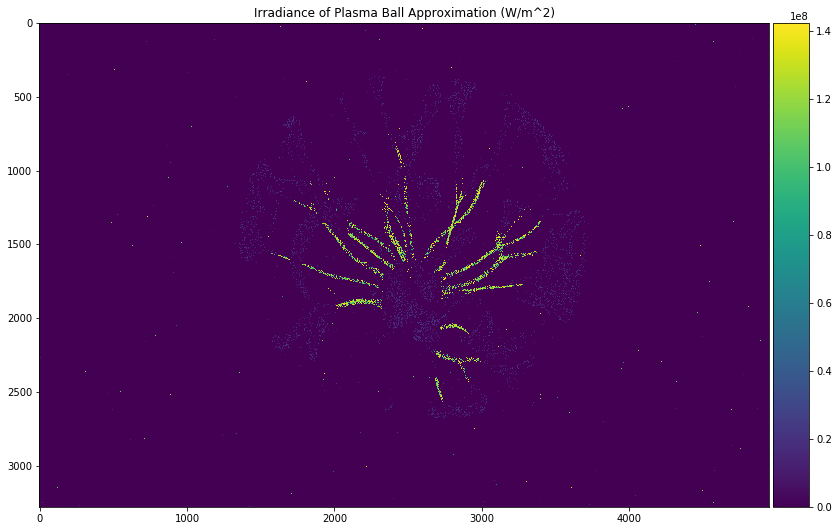

In [51]:
plt.rcParams["figure.figsize"] = (80, 40)

# applying the Stefan-Boltzmann Law ?????
plt.subplot(1,5,5)
wavelengths = rgba.get_wavelengths(test)
im = plt.imshow(ph.stefan_boltzmann(pixels))

# labelling axes of plot
plt.title('Irradiance of Plasma Ball Approximation (W/m^2)')

# adjusting colorbar size
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right',size='5%',pad=0.05)
plt.colorbar(im, cax=cax)

In [54]:
# Approximating the amount of energy emitted by the plasma ball

# In theory, you can multiply the irradiance of a unit area 
# and multiply it by that area size, sum them up to get the power
print(np.sum(ph.stefan_boltzmann(pixels) * ph.pixel_area), 'W')

/home/mattketk/git/photometry-of-ordinary-objects/src/rgbapprox.py:63: RuntimeWarning: divide by zero encountered in true_divide
  inverse_hsv = np.divide(1, hsv_values[:,:,0], where=(hsv_values[:,:,2]>value_threshold), out=np.zeros_like(hsv_values[:,:,0]))


15276.111 W


# On the box of the plasma ball, it says it operates at *5 volts* and *300 mA*. That's about 1.5 W. 

## about 4 magnitudes from the answer.